># **Ciência dos Dados** <font color=green>- Projeto 1</font>
   #### <font color=grey> Lucas Nicascio dos Santos </font>

### Análise de indicadores de desenvolvimento social e econômico em níveis globais

&#9658; Indicadores selecionados: 
>1.  Índice de Desenvolvimento Humano (padrão);
2. Número de véiculos quatro rodas (carros, caminhões e ônibus) para cada 1000 habitantes;
3. Porcentagem da população com acesso à Internet

## Introdução 
   <p> O Índice de Desenvolvimento Humano (IDH) foi criado em 1990, como um reconhecimento de que os níveis de renda não são suficientes para capturar o conceito de desenvolvimento humano e qualidade de vida. O IDH tem como conceito de desenvolvimento humano a combinação de saúde, educação e renda em um índice composto. </p>
   <p> Há diversos fatores que corroboram para um crescimento ou diminuição nas tendências de crescimento do índice, metas integradas com estratégias e políticas em diversos setores sociais e econômicos. Partindo dessa premissa, o seguinte projeto tem como objetivo analisar dados e incorporar pesquisas históricas e resultados de relatórios econômicos para responder a seguinte pergunta: </p>
#### Qual o grau de influência sobre o IDH possuem os fatores de acesso à infraestrutura, como o grau de capilaridade da internet em um país, e como é possível relacionar tais fatores ao crescente número de veículos para cada 1000 habitantes, de acordo com o "World Economic Forum"? 


## Análise Exploratória

Inicialmente é necessário ler e então filtrar os dados obtidos a partir da plataforma "Gapminder" para então construir um Data Frame ábil para análise.

In [341]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [166]:
#leituras dos arquivos em Excel
hdi = pd.read_excel('hdi_human_development_index.xlsx')
net = pd.read_excel('internet_users.xlsx')
cars = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')

In [169]:
#verificação de qual ano possui menos valores nulos
net.isnull().sum().sort_values(ascending=True)

geo       0
2011      2
2007      3
1990      3
2014      4
2013      4
2008      4
2015      4
2016      4
2012      5
2010      5
2009      5
2002      7
2001      8
2005      9
2006     10
2004     10
2000     10
1999     12
2003     13
1998     18
1997     24
1996     34
1995     66
1994    110
1993    131
1992    145
1991    156
1989    186
1960    187
1965    187
1987    187
1976    187
1970    187
1975    187
1988    187
1977    187
1978    187
1979    187
1980    187
1982    187
1983    187
1984    187
1985    187
1986    187
1981    187
1962    194
1961    194
1969    194
1971    194
1966    194
1963    194
1964    194
1973    194
1974    194
1967    194
1972    194
1968    194
dtype: int64

In [170]:
#verificação de qual ano possui menos valores nulos
cars.isnull().sum().sort_values(ascending=True)

geo       0
2007     12
2002     77
2003     82
2004     95
2005    107
2006    120
dtype: int64

In [171]:
#verificação de qual ano possui menos valores nulos
hdi.isnull().sum().sort_values(ascending=True)

geo      0
2013     0
2012     0
2011     0
2010     0
2014     0
2015     0
2005     6
2009     6
2008     6
2007     6
2006     6
2004    15
2003    18
2002    20
2001    20
2000    20
1999    37
1995    40
1998    40
1997    40
1996    40
1993    44
1992    44
1991    44
1990    44
1994    44
dtype: int64

In [172]:
#verificação dos anos comuns a cada banco de dados para posterior análise
columns = hdi.columns & net.columns & cars.columns
columns

Index(['geo', 2002, 2003, 2004, 2005, 2006, 2007], dtype='object')

In [173]:
#restrição da análise à apenas um ano em cada tabela (o ano com menos "NaN")
hdi_2007 = hdi.loc[:,["geo", 2007]]
net_2007 = net.loc[:,["geo", 2007]]
cars_2007 = cars.loc[:,["geo", 2007]]

In [263]:
#Troca de índices
hdi_idx = hdi_2007.set_index('geo')
net_idx = net_2007.set_index('geo')
cars_idx =  cars_2007.set_index('geo')

In [177]:
#Renomeação da coluna da emissão de CO2
cars_idz = cars_idx.rename(index=str, columns= lambda column: str(column) + "_Carros")

In [264]:
#Agrupamento das duas primeiras variáveis
df = hdi_idx.join(net_idx, how='inner' , lsuffix= '_hdi', rsuffix= '_Internet')
#Agrupamento com a terceira variável
data = df.join(cars_idz, how="inner")

In [391]:
#Remoção dos valores "NaN"
data_final = data.dropna(how="any")

A análise da correlação dos dados coletados e filtrados pode dar suporte a compreensão do grau de influência das variáveis entre si. Por meio da biblioteca Seaborn em uma matriz de dispersão no seguinte comando é possível obter uma visão macro de cada  correlação:

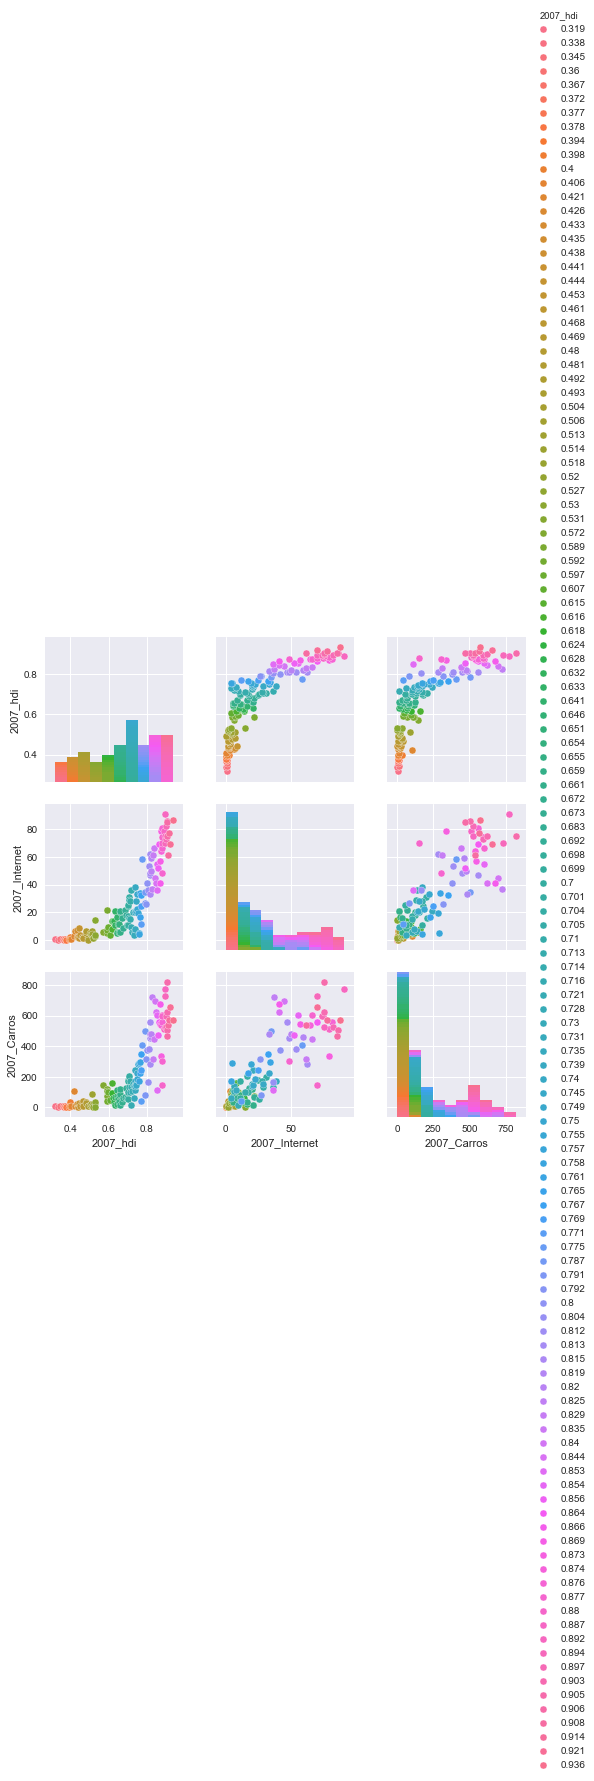

In [86]:
sns.set(style="darkgrid")

sns.pairplot(data_final,hue="2007_hdi")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

O comportamento dos indicadores de uso de internet ou de quantidade de automóveis em relação ao IDH demonstram ser exponenciais, enquanto a relação do primeiro com o segundo é linear e crescente,ou seja, há uma associação positiva, salvo alguns outliers.
Outra ocorrência notável é que países considerados desenvolvidos (IDH>=0.8) estão mais proximos do canto superior direito mesmo na comparação de usuários de internet e número de veículos.
<p>Pode ser confirmado também pelos Histogramas que esses mesmos países são aqueles que possuem a maior frequência de pessoas com acesso a Internet, embora 4 bilhões de pessoas no mundo ainda não possuem acesso. Por meio de um estudo da International Comunication Union, é possível explicar tal comportamento analisando a infraestutura do acesso a internet ao redor do mundo. Em regiões com menor IDH como a Africa Subsaariana, é maior o número de pessoas que precisam compartilhar do mesmo IXP (Internet Exchange Point) em camparação com a América do Norte, por exemplo. Dessa forma, a maior parte desses 4 bilhões devem ser parte da população com padrões de vida mais baixos e menor IDH.</p>

<p>Ainda que há uma pequena dispersão dos dados em cada gráfico, não é possível afirmar qual a relação de influência entre eles, ou seja, a padronização  da influência da quantidade de usuários com acesso à internet sobre o IDH, ou vice versa, e a influência do número de veículos para cada 1000 habitantes também sobre o IDH na lista de países. </p>
<p> Dessa forma, foi utilizado o seguinte comando para obter um DataFrame com o grau de correlação das variáveis:</p>

In [185]:
data_final.corr()

,2007_hdi,2007_Internet,2007_Carros
2007_hdi,1.000000,0.836818,0.806240
2007_Internet,0.836818,1.000000,0.868316
2007_Carros,0.806240,0.868316,1.000000


De acordo com os artigos "We Need To Change How We Think About The Internet In The Developing World" (Forbes), "Technology can empower children in developing countries - if it's done right" (The Guardian) e utilizando como suporte os gráficos obtidos pela análise dos dados, com relação a internet, um aumento no investimento, modernização e facilitação do acesso à internet barata, possibilita a criação de milhões de postos de trabalho e uma movimentação de economia na escala de bilhões de dolares. Dessa forma, pode-se pontuar que a característica exponencial no comportamento do gráfico que relaciona o IDH com a capilaridade do acesso à internet é derivada de investimentos no setor de infraestrutura em telecomunicações que impactam diretamente em alguns dos fatores do IDH, a renda per capita, e educação que por consequencia, contribui para o aumento no índice.


A partir das seguintes linhas de código, pode-se plotar um gráfico com um ajuste logaritimico dos dados, de forma a facilitar a constatação de uma linha de tendência de crescimento positiva para o período escolhido 

In [342]:
hdi_log = np.log(data_final["2007_hdi"])
net_log = np.log(data_final["2007_Internet"])
cars_log = np.log(data_final["2007_Carros"])

In [348]:
def reta(data_final_x, data_final_y):    
    a = data_final_y.cov(data_final_x) / data_final_x.var()
    b = data_final_y.mean() - a*data_final_x.mean()
 
    print('Ajuste linear:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize = (8, 6))
    plt.scatter(data_final_x, data_final_y, c='tomato', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('HDI')
    plt.ylabel('Número de usuários de Internet a cada 1000 habitantes (10^y)')
 
    plt.plot((data_final_x.min(), data_final_x.max()), (a*data_final_x.min()+b, a*data_final_x.max()+b), color='aqua')
 
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Ajuste linear:
Coeficiente linear: 4.648968099834786
Coeficiente angular: 4.997763208487012


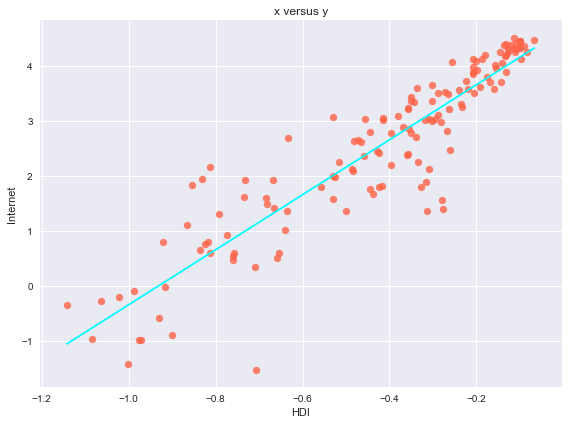

In [349]:
reta(hdi_log, net_log)

Dando continuidade à análise, pode-se perceber que o comportamento dos países no gráfico de dispersão de automóveis por IDH é semelhante ao comportamento da análise anterior, ou seja, exponencial

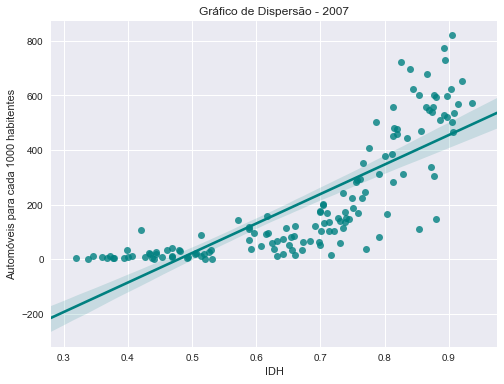

In [387]:
fig = plt.figure(figsize=(8, 6))
sns.regplot(data_final["2007_hdi"], data_final["2007_Carros"], color=('teal'))
plt.title('Gráfico de Dispersão - 2007')
plt.xlabel('IDH')
plt.ylabel('Automóveis para cada 1000 habitentes')
plt.grid(True)

Apesar de ter uma tendência clara de crescimento, o gráfico apresenta um comportamento exponencial, o que dificulta a visualização de pontos de influência em uma regressão linear. Assim, utilizando o mesmo comando da análise anterior, pode-se obter o seguinte gráfico para o amesmo ano, 2007:

Ajuste linear entre X3 e X4:
Coeficiente linear: 6.7288011349166466
Coeficiente angular: 5.277395925888807


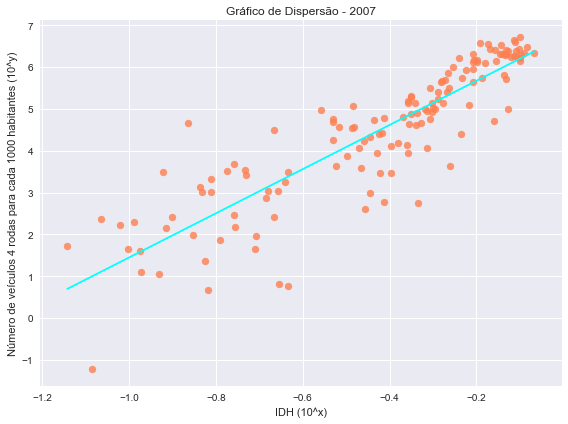

In [388]:
 def reta(data_final_x, data_final_y):    
    a = data_final_y.cov(data_final_x) / data_final_x.var()
    b = data_final_y.mean() - a*data_final_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_final_x, data_final_y, c='coral', alpha=0.8)
    plt.title('Gráfico de Dispersão - 2007')
    plt.xlabel('IDH (10^x)')
    plt.ylabel('Número de veículos 4 rodas para cada 1000 habitantes (10^y)')
 
    plt.plot((data_final_x.min(), data_final_x.max()), (a*data_final_x.min()+b, a*data_final_x.max()+b), color='aqua')
 
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
reta(hdi_log, cars_log)

<p>A densidade de automóveis de quatro rodas em um país, segundo o artigo "Modelling Global Vehicle Ownership" não está necessariamente ligada com a densidade populacional, portanto um país muito populoso pode ter uma baixa necessidade por veículos. Padrões de consumo na compra de carros, podem estar relacionadas portanto com o poder de compra de uma determinada população, ou seja, a renda per capita. Além disso, outro fator de extrema importância contribui para tal ocorrência: o investimento do Governo no indústria automobilistica. </p>
<p>No início do século XXI até meados de 2004, o Brasil investiu em novas montadoras de carros, aumentando gradativamente a produção em diversas regiões do país. Tal fator contribuiu para uma diminuição no preço do automóvel e consequentemente, um aumento na realização de aquisições.</p>
<p> Ações como essa, similares às da Internet, são classificadas como investimentos em infraestutura, porém na área dos transpotes. Dessa forma, a característica exponencial observada no gráfico e no valor de correlação HDI-Carros (0.8) indica que o número de carros presentes em um país a cada 1000 habitantes pode ser relacionado com o aumento no índice do IDH por meio da ótica de fatores relacionados à incentivos e modernização da infraestutura em um determinado país.</p>
<p> Uma possível hipótese para tal elevada correlação está no aumento da geração de empregos. O investimento consistente em infraestrutura de transporte, com obras rodoviárias, por exemplo, é um indutor crescimento da economia, gerando empregos, que possui relação direta com o PIB do país.

O seguinte gráfico pode facilitar para visualização da relação dos 3 indicadores:

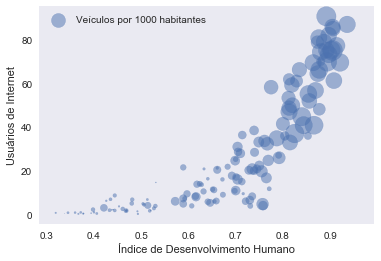

In [389]:
x = data_final["2007_hdi"]
y = data_final["2007_Internet"]
area = data_final["2007_Carros"]/data_final["2007_Carros"].max()* 400

plt.scatter(x, y, s=area, alpha=0.5, label = "Veículos por 1000 habitantes")
plt.xlabel("Índice de Desenvolvimento Humano")
plt.ylabel("Usuários de Internet")
plt.legend()
plt.grid()
plt.show()

Gerando um novo Data Frame com a inclusão dos anos comuns para todos os indicadores, pode-se compreender projeções para demais anos 

In [137]:
hdi_anos = hdi.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]
internet_anos = net.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]
carros_anos = cars.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]

In [229]:
hdi_idw = hdi_anos.set_index('geo')
internet_idw = internet_anos.set_index('geo')
cars_idy = carros_anos.set_index('geo')
cars_idw = cars_idy.rename(index=str, columns= lambda column: str(column) + "_carros")

In [230]:
datta = hdi_idw.join(internet_idw, how='inner' , lsuffix= '_hdi', rsuffix= '_internet')

In [255]:
dframe = datta.join(cars_idw, how="inner")
dataframe = dframe.dropna(how="any")

In [256]:
log = np.log(dataframe)

In [397]:
def graph(ano_inicial, ano_final, eixox, eixoy, data_set, titulo_grafico, label_x, label_y):
    lista = np.arange(ano_inicial, ano_final+1)
    fig = plt.figure(figsize=(12, 7))
    for d in lista:
        
        dados_x = data_set[str(d) + eixox]
        dados_y = data_set[str(d) + eixoy]
       
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()
 
        plt.scatter(dados_x, dados_y, alpha=0.8)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b))
    
    plt.axvspan(-0.4,-0.25, 0, 0.3, color='white', alpha=0.5)

    plt.tight_layout()
    plt.title(titulo_grafico)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
No gráfico abaixo estão destacados na área em branco alguns outliers, pontos que fogem do padrão analisado até o momento.

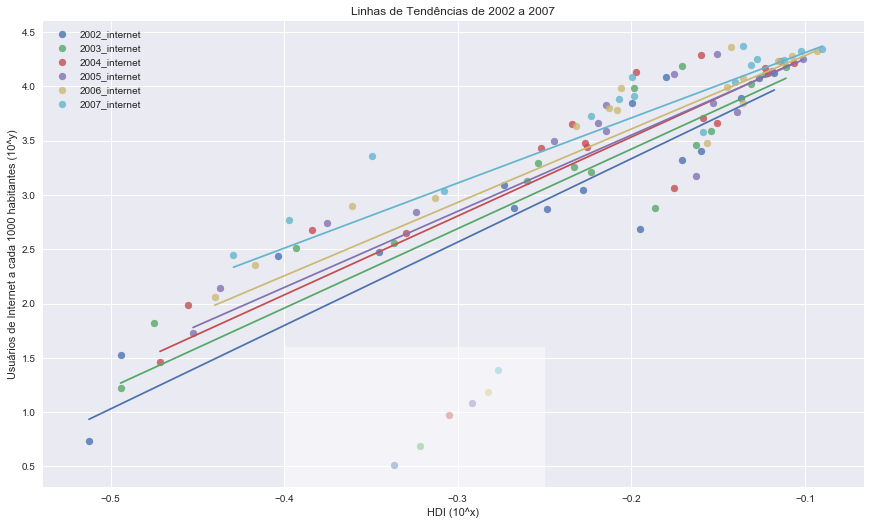

In [398]:
graph(2002, 2007,"_hdi", "_internet", log, "Linhas de Tendências de 2002 a 2007", "HDI (10^x)", "Usuários de Internet a cada 1000 habitantes (10^y)")

In [276]:
log[(log['2002_internet']< 1.5) & (log['2002_hdi']<-0.25) & (log['2002_hdi']>-0.4)]

,2002_hdi,2003_hdi,2004_hdi,2005_hdi,2006_hdi,2007_hdi,2002_internet,2003_internet,2004_internet,2005_internet,2006_internet,2007_internet,2002_carros,2003_carros,2004_carros,2005_carros,2006_carros,2007_carros
geo,,,,,,,,,,,,,,,,,,
Kazakhstan,-0.336872,-0.321584,-0.305167,-0.29169,-0.282363,-0.277072,0.512824,0.693147,0.97456,1.085189,1.18479,1.391282,4.49981,4.564348,4.60517,4.75359,4.934474,5.135798


O país identificado pelo padrão distante da linha de tendência é o Cazaquistão, que possui um regime de restrição e controle ao acesso à Web no país

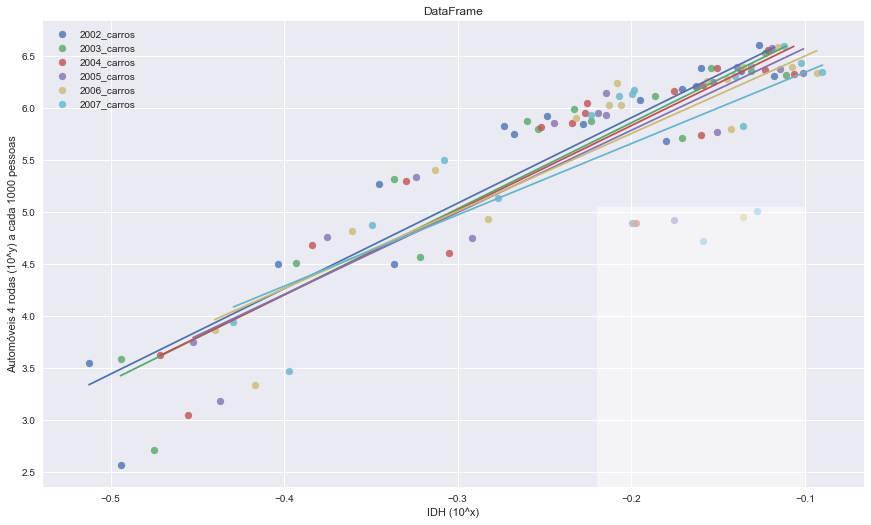

In [396]:
def graph(ano_inicial, ano_final, eixox, eixoy, data_set, titulo_grafico, label_x, label_y):
    lista = np.arange(ano_inicial, ano_final+1)
    fig = plt.figure(figsize=(12, 7))
    for d in lista:
        
        dados_x = data_set[str(d) + eixox]
        dados_y = data_set[str(d) + eixoy]
       
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()
 
        plt.scatter(dados_x, dados_y, alpha=0.8)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b))
    
    plt.axvspan(-0.22,-0.1, 0, 0.6, color='white', alpha=0.5)

    plt.tight_layout()
    plt.title(titulo_grafico)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.grid(True)
    plt.show()
graph(2002, 2007,"_hdi", "_carros", log, "DataFrame", "IDH (10^x)", "Automóveis 4 rodas (10^y) a cada 1000 pessoas")

In [366]:
log[(log['2002_carros']< 5.5) & (log['2002_hdi']<-0.1) & (log['2002_hdi']>-0.2)]

,2002_hdi,2003_hdi,2004_hdi,2005_hdi,2006_hdi,2007_hdi,2002_internet,2003_internet,2004_internet,2005_internet,2006_internet,2007_internet,2002_carros,2003_carros,2004_carros,2005_carros,2006_carros,2007_carros
geo,,,,,,,,,,,,,,,,,,
Singapore,-0.199671,-0.198451,-0.197232,-0.175545,-0.13582,-0.127833,3.850148,3.985273,4.127134,4.110874,4.077537,4.247066,4.890349,4.890349,4.89784,4.919981,4.94876,5.003946


Nesse caso, o país Outlier é Singapura que tem uma das maiores taxas no mundo para compra de carros, dificultando sua aquisição, validando uma afirmação anterior quanto a relação no preço dos automóveis em um país e a quantidade de veículos para cada 1000 habitantes no mesmo.

Uma possível análise destinada a pesquisas futuras seria encontrar a razão pela qual aparentemente há uma tendência na diminuição do coeficiente linear na linha de tendência ao longo dos anos. Como hipótese, tal ocorrência poderia ser explicada pela crescente adoção de políticas sustentáveis com um crescimento na malha de transportes públicos, como exemplo o Chile. Ou então alguma ocorrência economômica a nivel global que afetou o preço dos automóveis, tornando-os cada vez mais caros.

## Conclusão

Pode-se concluir pelo estudo que ao analisados pela ótica fatores relacionados a infraestrutura como telecomunicações (uso de internet) e transportes (quantidade de veículos 4 rodas para cada 1000 habitantes), os indicadores selecionados são relevantes para determinar o Índice de Desenvolvimento de um país, pois estão correlacionados com a geração de empregos, o acesso a educação e o Produto Interno Bruto.

In [392]:
dataframe.to_excel("Projeto_1.xlsx")
dataframe.to_csv("Projeto_1.csv")

## Referências

<p>https://www.theguardian.com/world/2017/oct/24/singapore-no-more-cars-allowed-on-the-road-government-says</p>
<p>https://dollarsandsense.sg/no-nonsense-explanation-on-why-cars-in-singapore-are-so-expensive/</p>
<p>https://www.researchgate.net/publication/301770312_Infrastructure_Access_and_Human_Development_Cross-_Country_Evidence_and_Post-2015_Development_Strategies</p>
<p>https://econation.co.nz/population-and-consumption/</p>
<p>https://www.theguardian.com/sustainable-business/technology-empower-children-developing-countries</p>
<p>https://www.forbes.com/sites/strategyand/2016/06/08/we-need-to-change-how-we-think-about-the-internet-in-the-developing-world/#20b9478c3cbf</p>
<p>https://www.strategy-business.com/article/Why-Are-4-Billion-People-without-the-Internet?gko=cd483</p>
<p>https://www.kth.se/social/upload/52a4c976f276547043781cfb/Dargay%20Gately%202001.pdf</p>
